<a href="https://colab.research.google.com/github/JakubCzech/Interns2020/blob/master/UNET_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import cv2
import os

def sp_noise(image, prob):
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

counter = 0
directory = r'/content/drive/My Drive/Interns/dataset/img'
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        print(os.path.join(directory, filename))
        image = cv2.imread(os.path.join(directory, filename), 0)  # Only for grayscale image
        noise_img = sp_noise(image, 0.05)
        cv2.imwrite('/content/drive/My Drive/Interns/dataset/noised/'+ str(counter) +'.jpg', noise_img)
        cv2.imwrite('/content/drive/My Drive/Interns/dataset/clean/'+ str(counter) + '.jpg', image)
    else:
        continue
    counter += 1
print(counter)

#source https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv

/content/drive/My Drive/Interns/dataset/img/11_32.jpg
/content/drive/My Drive/Interns/dataset/img/3_32.jpg
/content/drive/My Drive/Interns/dataset/img/7_32.jpg
/content/drive/My Drive/Interns/dataset/img/9_32.jpg
/content/drive/My Drive/Interns/dataset/img/8_32.jpg
/content/drive/My Drive/Interns/dataset/img/5_32.jpg
/content/drive/My Drive/Interns/dataset/img/6_32.jpg
/content/drive/My Drive/Interns/dataset/img/10_32.jpg
/content/drive/My Drive/Interns/dataset/img/4_32.jpg
/content/drive/My Drive/Interns/dataset/img/2_32.jpg
/content/drive/My Drive/Interns/dataset/img/21_32.jpg
/content/drive/My Drive/Interns/dataset/img/13_32.jpg
/content/drive/My Drive/Interns/dataset/img/17_32.jpg
/content/drive/My Drive/Interns/dataset/img/18_32.jpg
/content/drive/My Drive/Interns/dataset/img/20_32.jpg
/content/drive/My Drive/Interns/dataset/img/16_32.jpg
/content/drive/My Drive/Interns/dataset/img/19_32.jpg
/content/drive/My Drive/Interns/dataset/img/14_32.jpg
/content/drive/My Drive/Interns/data

In [ ]:
import numpy as np
import random
import cv2
import os

def sp_noise(image, prob):
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

counter = 0
directory = r'/content/drive/My Drive/Interns/dataset/test_img'
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        print(os.path.join(directory, filename))
        image = cv2.imread(os.path.join(directory, filename), 0)  # Only for grayscale image
        noise_img = sp_noise(image, 0.05)
        cv2.imwrite('/content/drive/My Drive/Interns/dataset/test_noised/'+ str(counter) +'.jpg', noise_img)
        cv2.imwrite('/content/drive/My Drive/Interns/dataset/test_clean/'+ str(counter) + '.jpg', image)
    else:
        continue
    counter += 1
print(counter)

#source https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv

/content/drive/My Drive/Interns/dataset/test_img/7_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/34_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/29_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/32_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/28_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/31_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/30_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/36_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/35_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/33_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/27_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/22_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/24_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/18_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/21_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/25_32.jpg
/content/drive/My Drive/Interns/dataset/test_img/26_32.jp

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


class Denoising():
    NOISED = "/content/drive/My Drive/Interns/dataset/noised/"
    CLEAN = "/content/drive/My Drive/Interns/dataset/clean"
    TESTING = ""
    training_data = []

    def make_training_data(self):
        directory_n = self.NOISED
        directory_c = self.CLEAN
        for filename in os.listdir(directory_n):
            if filename.endswith(".jpg"):
                path_noised = os.path.join(directory_n, filename)
                img_noised = cv2.imread(path_noised)
                path_clean = os.path.join(directory_c, filename)
                img_clean = cv2.imread(path_clean)
                self.training_data.append([np.array(img_noised), np.array(img_clean)])  # do something like print(np.eye(2)[1]), just makes one_hot

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)

dn = Denoising()
dn.make_training_data()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch
import torch.optim as optim
import os
import natsort
from PIL import Image

In [ ]:
tsfms = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
class CustomDataSet(Dataset):
    def __init__(self, noised_dir, clean_dir, transform):
        self.noised_dir = noised_dir
        self.clean_dir = clean_dir
        self.transform = transform
        noised_imgs = os.listdir(noised_dir)
        clean_imgs = os.listdir(clean_dir)

        self.noised_paths = natsort.natsorted(noised_imgs)
        self.clean_paths = natsort.natsorted(clean_imgs)

    def __len__(self):
        assert len(self.noised_paths) == len(self.clean_paths)
        return len(self.noised_paths)

    def __getitem__(self, idx):
        img_noised = os.path.join(self.noised_dir, self.noised_paths[idx])
        img_clean = os.path.join(self.clean_dir, self.clean_paths[idx])

        image_n = Image.open(img_noised)
        image_c = Image.open(img_clean)

        tensor_image_n = self.transform(image_n)
        tensor_image_c = self.transform(image_c)
        return (tensor_image_n, tensor_image_c)


In [ ]:
class denoising_model(nn.Module):
    def __init__(self):
        super(denoising_model, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(32*32, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 512),
            nn.ReLU(True),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True)
        )

        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 32*32),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)

        return x

  0%|          | 0/1 [00:00<?, ?it/s]

Entering Epoch:  0


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 0/120, Loss:0.05132604017853737
Entering Epoch:  1


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 1/120, Loss:0.05118147283792496
Entering Epoch:  2


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 2/120, Loss:0.05103693902492523
Entering Epoch:  3


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 3/120, Loss:0.050877273082733154
Entering Epoch:  4


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 4/120, Loss:0.05069534108042717
Entering Epoch:  5


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 5/120, Loss:0.05049039423465729
Entering Epoch:  6


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 6/120, Loss:0.05026805400848389
Entering Epoch:  7


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 7/120, Loss:0.05004112794995308
Entering Epoch:  8


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 8/120, Loss:0.04983264207839966
Entering Epoch:  9


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 9/120, Loss:0.049676209688186646
Entering Epoch:  10


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 10/120, Loss:0.049607619643211365
Entering Epoch:  11


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 11/120, Loss:0.04962873086333275
Entering Epoch:  12


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 12/120, Loss:0.04966045916080475
Entering Epoch:  13


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 13/120, Loss:0.04963025450706482
Entering Epoch:  14


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 14/120, Loss:0.04954642429947853
Entering Epoch:  15


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 15/120, Loss:0.049441806972026825
Entering Epoch:  16


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 16/120, Loss:0.049358054995536804
Entering Epoch:  17


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 17/120, Loss:0.04930197447538376
Entering Epoch:  18


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 18/120, Loss:0.04928324744105339
Entering Epoch:  19


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 19/120, Loss:0.049249932169914246
Entering Epoch:  20


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 20/120, Loss:0.049217790365219116
Entering Epoch:  21


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 21/120, Loss:0.049157220870256424
Entering Epoch:  22


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 22/120, Loss:0.049031104892492294
Entering Epoch:  23


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 23/120, Loss:0.04889141395688057
Entering Epoch:  24


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 24/120, Loss:0.04876385256648064
Entering Epoch:  25


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 25/120, Loss:0.04855453222990036
Entering Epoch:  26


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 26/120, Loss:0.04829280450940132
Entering Epoch:  27


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 27/120, Loss:0.047802336513996124
Entering Epoch:  28


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 28/120, Loss:0.04829297959804535
Entering Epoch:  29


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 29/120, Loss:0.047456368803977966
Entering Epoch:  30


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 30/120, Loss:0.04758400842547417
Entering Epoch:  31


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 31/120, Loss:0.046536266803741455
Entering Epoch:  32


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 32/120, Loss:0.046986039727926254
Entering Epoch:  33


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 33/120, Loss:0.04514823853969574
Entering Epoch:  34


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 34/120, Loss:0.045236505568027496
Entering Epoch:  35


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 35/120, Loss:0.04387131333351135
Entering Epoch:  36


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 36/120, Loss:0.0467839241027832
Entering Epoch:  37


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 37/120, Loss:0.04444517940282822
Entering Epoch:  38


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 38/120, Loss:0.04651886597275734
Entering Epoch:  39


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 39/120, Loss:0.04620830714702606
Entering Epoch:  40


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 40/120, Loss:0.04352032020688057
Entering Epoch:  41


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 41/120, Loss:0.043480902910232544
Entering Epoch:  42


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 42/120, Loss:0.04302943870425224
Entering Epoch:  43


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 43/120, Loss:0.04168931394815445
Entering Epoch:  44


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 44/120, Loss:0.042709216475486755
Entering Epoch:  45


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 45/120, Loss:0.04184935986995697
Entering Epoch:  46


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 46/120, Loss:0.040887314826250076
Entering Epoch:  47


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 47/120, Loss:0.04198458045721054
Entering Epoch:  48


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 48/120, Loss:0.04039338231086731
Entering Epoch:  49


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 49/120, Loss:0.04117869585752487
Entering Epoch:  50


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 50/120, Loss:0.040558021515607834
Entering Epoch:  51


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 51/120, Loss:0.039991822093725204
Entering Epoch:  52


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 52/120, Loss:0.040415454655885696
Entering Epoch:  53


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 53/120, Loss:0.03947184234857559
Entering Epoch:  54


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 54/120, Loss:0.03986288607120514
Entering Epoch:  55


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 55/120, Loss:0.03906740993261337
Entering Epoch:  56


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 56/120, Loss:0.03915465623140335
Entering Epoch:  57


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 57/120, Loss:0.03848563879728317
Entering Epoch:  58


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 58/120, Loss:0.0384117066860199
Entering Epoch:  59


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 59/120, Loss:0.038011275231838226
Entering Epoch:  60


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 60/120, Loss:0.03761863708496094
Entering Epoch:  61


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 61/120, Loss:0.037266846746206284
Entering Epoch:  62


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 62/120, Loss:0.037042438983917236
Entering Epoch:  63


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 63/120, Loss:0.03658224269747734
Entering Epoch:  64


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 64/120, Loss:0.036538220942020416
Entering Epoch:  65


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 65/120, Loss:0.03591747581958771
Entering Epoch:  66


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 66/120, Loss:0.03595222532749176
Entering Epoch:  67


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 67/120, Loss:0.03567606210708618
Entering Epoch:  68


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 68/120, Loss:0.035285674035549164
Entering Epoch:  69


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 69/120, Loss:0.035359397530555725
Entering Epoch:  70


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 70/120, Loss:0.03534802421927452
Entering Epoch:  71


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 71/120, Loss:0.03505215048789978
Entering Epoch:  72


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 72/120, Loss:0.03484238684177399
Entering Epoch:  73


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 73/120, Loss:0.03490740805864334
Entering Epoch:  74


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 74/120, Loss:0.03508663922548294
Entering Epoch:  75


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 75/120, Loss:0.03518390655517578
Entering Epoch:  76


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 76/120, Loss:0.0350283682346344
Entering Epoch:  77


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 77/120, Loss:0.034740280359983444
Entering Epoch:  78


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 78/120, Loss:0.03462132439017296
Entering Epoch:  79


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 79/120, Loss:0.034744568169116974
Entering Epoch:  80


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 80/120, Loss:0.034913793206214905
Entering Epoch:  81


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 81/120, Loss:0.034903980791568756
Entering Epoch:  82


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 82/120, Loss:0.03473164886236191
Entering Epoch:  83


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 83/120, Loss:0.034561336040496826
Entering Epoch:  84


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 84/120, Loss:0.034556277096271515
Entering Epoch:  85


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 85/120, Loss:0.034678440541028976
Entering Epoch:  86


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 86/120, Loss:0.034794989973306656
Entering Epoch:  87


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 87/120, Loss:0.03481739014387131
Entering Epoch:  88


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 88/120, Loss:0.03468659520149231
Entering Epoch:  89


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 89/120, Loss:0.03453533351421356
Entering Epoch:  90


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 90/120, Loss:0.03448329493403435
Entering Epoch:  91


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 91/120, Loss:0.034548960626125336
Entering Epoch:  92


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 92/120, Loss:0.0346466526389122
Entering Epoch:  93


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 93/120, Loss:0.034661438316106796
Entering Epoch:  94


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 94/120, Loss:0.03458508104085922
Entering Epoch:  95


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 95/120, Loss:0.03447965160012245
Entering Epoch:  96


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 96/120, Loss:0.034450240433216095
Entering Epoch:  97


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 97/120, Loss:0.03450121730566025
Entering Epoch:  98


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 98/120, Loss:0.03456345945596695
Entering Epoch:  99


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 99/120, Loss:0.03457432985305786
Entering Epoch:  100


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 100/120, Loss:0.03450683876872063
Entering Epoch:  101


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 101/120, Loss:0.034434545785188675
Entering Epoch:  102


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 102/120, Loss:0.03441105782985687
Entering Epoch:  103


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 103/120, Loss:0.034439511597156525
Entering Epoch:  104


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 104/120, Loss:0.034490667283535004
Entering Epoch:  105


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 105/120, Loss:0.03452836722135544
Entering Epoch:  106


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 106/120, Loss:0.03453262522816658
Entering Epoch:  107


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 107/120, Loss:0.034472331404685974
Entering Epoch:  108


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 108/120, Loss:0.03440198674798012
Entering Epoch:  109


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 109/120, Loss:0.03436646610498428
Entering Epoch:  110


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 110/120, Loss:0.03438087925314903
Entering Epoch:  111


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 111/120, Loss:0.03441883251070976
Entering Epoch:  112


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 112/120, Loss:0.03444155678153038
Entering Epoch:  113


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 113/120, Loss:0.03443385288119316
Entering Epoch:  114


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 114/120, Loss:0.03439242020249367
Entering Epoch:  115


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 115/120, Loss:0.03434739261865616
Entering Epoch:  116


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 116/120, Loss:0.034320563077926636
Entering Epoch:  117


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 117/120, Loss:0.03431955724954605
Entering Epoch:  118


  0%|          | 0/1 [00:00<?, ?it/s]

======> epoch: 118/120, Loss:0.03433607518672943
Entering Epoch:  119


100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


======> epoch: 119/120, Loss:0.034358009696006775


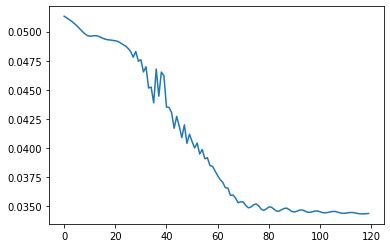

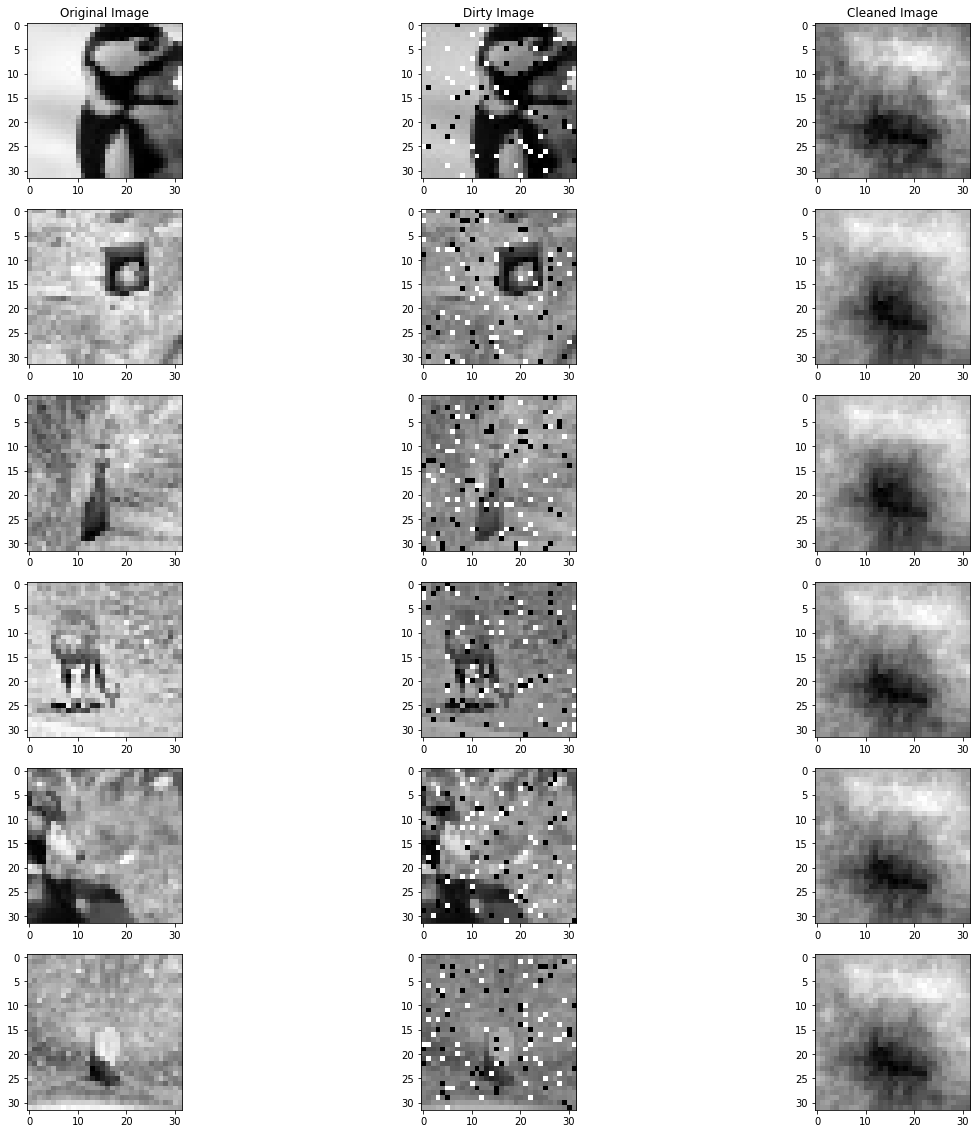

In [ ]:
if __name__ == '__main__':
       #Dataset
    dataset = CustomDataSet("/content/drive/My Drive/Interns/dataset/noised/", "/content/drive/My Drive/Interns/dataset/clean", transform=tsfms)
    dataset_test = CustomDataSet("/content/drive/My Drive/Interns/dataset/test_noised", "/content/drive/My Drive/Interns/dataset/test_clean", transform=tsfms)
    train_loader = DataLoader(dataset, batch_size=256, shuffle=False,
                              num_workers=4, drop_last=True)

    test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False,
                              num_workers=4, drop_last=True)
    model = denoising_model()

    # We check whether cuda is available and choose device accordingly
    if torch.cuda.is_available() == True:
        device = "cuda:0"
    else:
        device = "cpu"

    model = denoising_model().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)

    epochs = 120
    l = len(train_loader)
    losslist = list()
    epochloss = 0
    running_loss = 0
    min_loss = 666666666666666

    TRAIN = True
    if TRAIN:
        for epoch in range(epochs):

            print("Entering Epoch: ", epoch)
            for dirty, clean in tqdm((train_loader)):

                dirty = dirty.view(dirty.size(0), -1).type(torch.FloatTensor)
                clean = clean.view(clean.size(0), -1).type(torch.FloatTensor)
                dirty, clean = dirty.to(device), clean.to(device)

                output = model(dirty)
                loss = criterion(output, clean)

                optimizer.zero_grad()

                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                epochloss += loss.item()
                device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


            losslist.append(running_loss / l)

            if loss.item() < min_loss:
                torch.save(model.state_dict(), "/content/drive/My Drive/Interns/dataset/model/model.pt")
                min_loss = loss.item()

            running_loss = 0
            print("======> epoch: {}/{}, Loss:{}".format(epoch, epochs, loss.item()))

        plt.plot(range(len(losslist)), losslist)

    #model = torch.load('X:/dataset/model/model.pt')
    model.eval()

    f, axes = plt.subplots(6, 3, figsize=(20, 20))
    axes[0, 0].set_title("Original Image")
    axes[0, 1].set_title("Dirty Image")
    axes[0, 2].set_title("Cleaned Image")

    # test_imgs = np.random.randint(0, 1126, size=6)
    test_imgs = np.asarray([i for i in range(6)])
    for idx in range((6)):
        dirty = dataset_test[test_imgs[idx]][0]
        clean = dataset_test[test_imgs[idx]][1]

        dirty = dirty.view(dirty.size(0), -1).type(torch.FloatTensor)
        dirty = dirty.to(device)
        output = model(dirty)

        output = output.view(1, 32, 32)
        output = output.permute(1, 2, 0).squeeze(2)
        output = output.detach().cpu().numpy()

        dirty = dirty.view(1, 32, 32)
        dirty = dirty.permute(1, 2, 0).squeeze(2)
        dirty = dirty.detach().cpu().numpy()

        clean = clean.permute(1, 2, 0).squeeze(2)
        clean = clean.detach().cpu().numpy()

        axes[idx, 0].imshow(clean, cmap="gray")
        axes[idx, 1].imshow(dirty, cmap="gray")
        axes[idx, 2].imshow(output, cmap="gray")
    plt.show()

    # torch.save(model.state_dict(), "X:/dataset/model/model.pt")

Entering Epoch:  0


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


======> epoch: 0/120, Loss:0.04671502858400345
Entering Epoch:  1
======> epoch: 1/120, Loss:0.018771333619952202
Entering Epoch:  2
======> epoch: 2/120, Loss:0.009961023926734924
Entering Epoch:  3
======> epoch: 3/120, Loss:0.007595716044306755
Entering Epoch:  4
======> epoch: 4/120, Loss:0.006276765838265419
Entering Epoch:  5
======> epoch: 5/120, Loss:0.005781057756394148
Entering Epoch:  6
======> epoch: 6/120, Loss:0.005629038903862238
Entering Epoch:  7
======> epoch: 7/120, Loss:0.00515932310372591
Entering Epoch:  8
======> epoch: 8/120, Loss:0.004596347454935312
Entering Epoch:  9
======> epoch: 9/120, Loss:0.004244701936841011
Entering Epoch:  10
======> epoch: 10/120, Loss:0.0038336750585585833
Entering Epoch:  11
======> epoch: 11/120, Loss:0.0035797045566141605
Entering Epoch:  12
======> epoch: 12/120, Loss:0.0032770615071058273
Entering Epoch:  13
======> epoch: 13/120, Loss:0.0032224305905401707
Entering Epoch:  14
======> epoch: 14/120, Loss:0.0029509570449590683
E

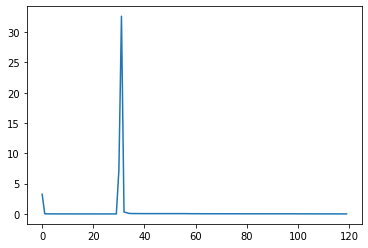

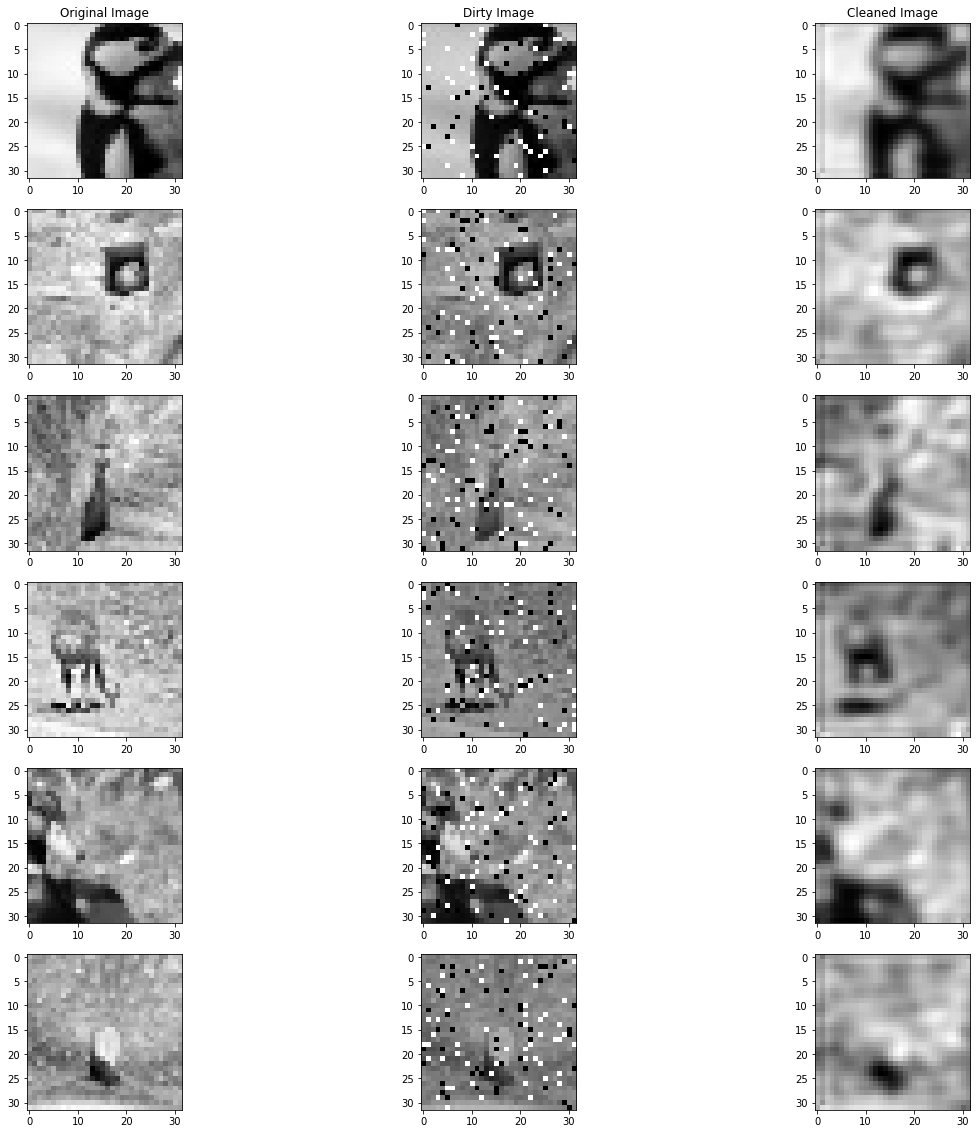

In [ ]:
# -*- coding: utf-8 -*-
"""Kopia notatnika unyeyy

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Xi42PGMMC-Q2wmVz8Stvzbq-bGTP_vo-
"""

import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import random
import natsort
from PIL import Image
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

torch.cuda.empty_cache()

from google.colab import drive


# drive.mount('/content/drive/My Drive/Interns/')

class CustomDataSet(Dataset):
    def __init__(self, noised_dir, clean_dir, transform):
        self.noised_dir = noised_dir
        self.clean_dir = clean_dir
        self.transform = transform
        noised_imgs = os.listdir(noised_dir)
        clean_imgs = os.listdir(clean_dir)

        self.noised_paths = natsort.natsorted(noised_imgs)
        self.clean_paths = natsort.natsorted(clean_imgs)

    def __len__(self):
        assert len(self.noised_paths) == len(self.clean_paths)
        return len(self.noised_paths)

    def __getitem__(self, idx):
        img_noised = os.path.join(self.noised_dir, self.noised_paths[idx])
        img_clean = os.path.join(self.clean_dir, self.clean_paths[idx])

        image_n = Image.open(img_noised)
        image_c = Image.open(img_clean)

        tensor_image_n = self.transform(image_n)
        tensor_image_c = self.transform(image_c)
        return (tensor_image_n, tensor_image_c)


tsfms = transforms.Compose([
    transforms.ToTensor()
])
# /content/drive/My Drive/stl10images/Noised_train/1

# dataset = CustomDataSet("/content/drive/My Drive/stl10images/Noised_train/1/","/content/drive/My Drive/stl10images/Clean_train/1/",transform=tsfms)
# dataset_test = CustomDataSet("/content/drive/My Drive/stl10images/test_Noised/1/","/content/drive/My Drive/stl10images/test_Clean/1/",transform=tsfms)
dataset = CustomDataSet("/content/drive/My Drive/Interns/dataset/noised/",
                        "/content/drive/My Drive/Interns/dataset/clean/", transform=tsfms)
dataset_test = CustomDataSet("/content/drive/My Drive/Interns/dataset/test_noised/",
                             "/content/drive/My Drive/Interns/dataset/test_clean/", transform=tsfms)

train_loader = DataLoader(dataset, batch_size=16, shuffle=False,
                          num_workers=4, drop_last=True)

test_loader = DataLoader(dataset_test, batch_size=16, shuffle=False,
                         num_workers=4, drop_last=True)


class UNet(nn.Module):
    def __init__(
            self,
            in_channels=1,
            n_classes=2,
            depth=5,
            wf=6,
            padding=False,
            batch_norm=False,
            up_mode='upconv',
    ):
        """
        Implementation of
        U-Net: Convolutional Networks for Biomedical Image Segmentation
        (Ronneberger et al., 2015)
        https://arxiv.org/abs/1505.04597
        Using the default arguments will yield the exact version used
        in the original paper
        Args:
            in_channels (int): number of input channels
            n_classes (int): number of output channels
            depth (int): depth of the network
            wf (int): number of filters in the first layer is 2**wf
            padding (bool): if True, apply padding such that the input shape
                            is the same as the output.
                            This may introduce artifacts
            batch_norm (bool): Use BatchNorm after layers with an
                               activation function
            up_mode (str): one of 'upconv' or 'upsample'.
                           'upconv' will use transposed convolutions for
                           learned upsampling.
                           'upsample' will use bilinear upsampling.
        """
        super(UNet, self).__init__()
        assert up_mode in ('upconv', 'upsample')
        self.padding = padding
        self.depth = depth
        prev_channels = in_channels
        self.down_path = nn.ModuleList()
        for i in range(depth):
            self.down_path.append(
                UNetConvBlock(prev_channels, 2 ** (wf + i), padding, batch_norm)
            )
            prev_channels = 2 ** (wf + i)

        self.up_path = nn.ModuleList()
        for i in reversed(range(depth - 1)):
            self.up_path.append(
                UNetUpBlock(prev_channels, 2 ** (wf + i), up_mode, padding, batch_norm)
            )
            prev_channels = 2 ** (wf + i)

        self.last = nn.Conv2d(prev_channels, n_classes, kernel_size=1)

    def forward(self, x):
        blocks = []
        for i, down in enumerate(self.down_path):
            x = down(x)
            if i != len(self.down_path) - 1:
                blocks.append(x)
                x = F.max_pool2d(x, 2)

        for i, up in enumerate(self.up_path):
            x = up(x, blocks[-i - 1])

        return self.last(x)


class UNetConvBlock(nn.Module):
    def __init__(self, in_size, out_size, padding, batch_norm):
        super(UNetConvBlock, self).__init__()
        block = []

        block.append(nn.Conv2d(in_size, out_size, kernel_size=3, padding=int(padding)))
        block.append(nn.ReLU())
        if batch_norm:
            block.append(nn.BatchNorm2d(out_size))

        block.append(nn.Conv2d(out_size, out_size, kernel_size=3, padding=int(padding)))
        block.append(nn.ReLU())
        if batch_norm:
            block.append(nn.BatchNorm2d(out_size))

        self.block = nn.Sequential(*block)

    def forward(self, x):
        out = self.block(x)
        return out


class UNetUpBlock(nn.Module):
    def __init__(self, in_size, out_size, up_mode, padding, batch_norm):
        super(UNetUpBlock, self).__init__()
        if up_mode == 'upconv':
            self.up = nn.ConvTranspose2d(in_size, out_size, kernel_size=2, stride=2)
        elif up_mode == 'upsample':
            self.up = nn.Sequential(
                nn.Upsample(mode='bilinear', scale_factor=2),
                nn.Conv2d(in_size, out_size, kernel_size=1),
            )

        self.conv_block = UNetConvBlock(in_size, out_size, padding, batch_norm)

    def center_crop(self, layer, target_size):
        _, _, layer_height, layer_width = layer.size()
        diff_y = (layer_height - target_size[0]) // 2
        diff_x = (layer_width - target_size[1]) // 2
        return layer[
               :, :, diff_y: (diff_y + target_size[0]), diff_x: (diff_x + target_size[1])
               ]

    def forward(self, x, bridge):
        up = self.up(x)
        crop1 = self.center_crop(bridge, up.shape[2:])
        out = torch.cat([up, crop1], 1)
        out = self.conv_block(out)

        return out


# for data in test_loader:
#   print(data)
#   break


# dirty = data[0][0]
# dirty=dirty.view(dirty.size(0), -1).type(torch.FloatTensor)
# dirty = dirty.view(3, 96, 96)
# dirty = dirty.permute(1, 2, 0).squeeze(2)
# plt.imshow(dirty)
# plt
losslist = list()
l = len(train_loader)
running_loss = 0
epochloss = 0

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(in_channels=1, n_classes=1, padding=True, up_mode='upsample').to(device)
optim = torch.optim.Adam(model.parameters())
dataloader = train_loader
epochs = 120
criterion = nn.MSELoss()

for epoch in range(epochs):

    print("Entering Epoch: ", epoch)
    for X, y in dataloader:
        X = X.to(device)  # [N, 1, H, W]
        y = y.to(device)  # [N, H, W] with class indices (0, 1)
        prediction = model(X)  # [N, 2, H, W]
        loss = criterion(prediction, y)

        optim.zero_grad()
        loss.backward()
        optim.step()

        running_loss += loss.item()
        epochloss += loss.item()

    losslist.append(running_loss / l)

    running_loss = 0
    print("======> epoch: {}/{}, Loss:{}".format(epoch, epochs, loss.item()))
plt.plot(range(len(losslist)), losslist)
torch.save(model.state_dict(), "/content/drive/My Drive/Interns/dataset/model/modelunet.pt")

# model = torch.load('/content/drive/My Drive/stl10images/modelunet.pt')
# model = UNet()
# model.to(device)
# model.load_state_dict(torch.load("/content/drive/My Drive/stl10images/modelunet.pt"))

model.eval()

# device = "cuda:0"

# inputx = data[0][0].to(device)
# outputx= model(data[0][0])

# ctn = 0
# for dirty, clean in test_loader:
#   print(dirty)
#   print(clean)
#   ctn += 1
#   if ctn == 6:
#     break

# dirty1 = data[0]
# dirty1=dirty1.view(dirty.size(0), -1).type(torch.FloatTensor)
# dirty1 = dirty1.view(3, 96, 96)
# dirty1 = dirty1.permute(1, 2, 0).squeeze(2)
# plt.imshow(dirty1)

f, axes = plt.subplots(6, 3, figsize=(20, 20))
axes[0, 0].set_title("Original Image")
axes[0, 1].set_title("Dirty Image")
axes[0, 2].set_title("Cleaned Image")

# test_imgs = np.random.randint(0, 1126, size=6)
test_imgs = np.asarray([i for i in range(6)])
for idx in range((6)):
    dirty = dataset_test[test_imgs[idx]][0]
    clean = dataset_test[test_imgs[idx]][1]

    # dirty = dirty.view(dirty.size(0), -1).type(torch.FloatTensor)
    dirty = dirty.unsqueeze(1)
    dirty = dirty.to(device)

    output = model(dirty)

    output = output.view(1, 32, 32)
    output = output.permute(1, 2, 0).squeeze(2)
    output = output.detach().cpu().numpy()

    dirty = dirty.view(1, 32, 32)
    dirty = dirty.permute(1, 2, 0).squeeze(2)
    dirty = dirty.detach().cpu().numpy()

    clean = clean.permute(1, 2, 0).squeeze(2)
    clean = clean.detach().cpu().numpy()

    axes[idx, 0].imshow(clean, cmap="gray")
    axes[idx, 1].imshow(dirty, cmap="gray")
    axes[idx, 2].imshow(output, cmap="gray")
plt.show()









